读取数据

In [3]:
import pandas as pd
import numpy as np


df = pd.read_csv('Pokemon.csv', encoding='gbk')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,TRUE
806,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
807,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


最后两行（实际读取有四行）数据无意义，可直接删去

In [4]:
print(f'删除前形状:{df.shape}')
df = df.iloc[:-4]
print(f'删除后形状:{df.shape}')

删除前形状:(810, 13)
删除后形状:(806, 13)


type2存在异常的数值取值，可清空

<Axes: xlabel='Type 2'>

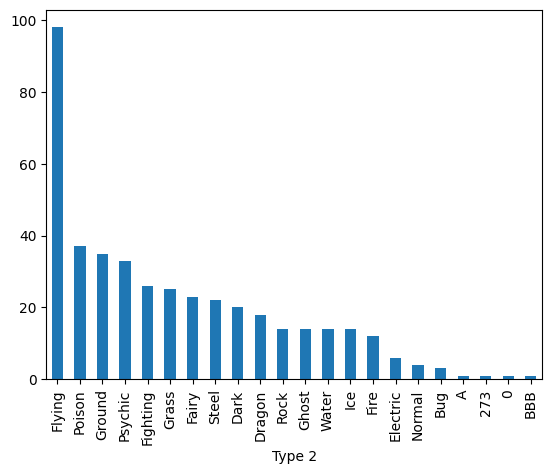

In [5]:
df['Type 2'].value_counts().plot(kind='bar')

C:\Users\28248\AppData\Local\Temp\ipykernel_25408\2874943582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['Type 2'].isin([273, 0, '273', '0']), 'Type 2'] = np.nan


<Axes: xlabel='Type 2'>

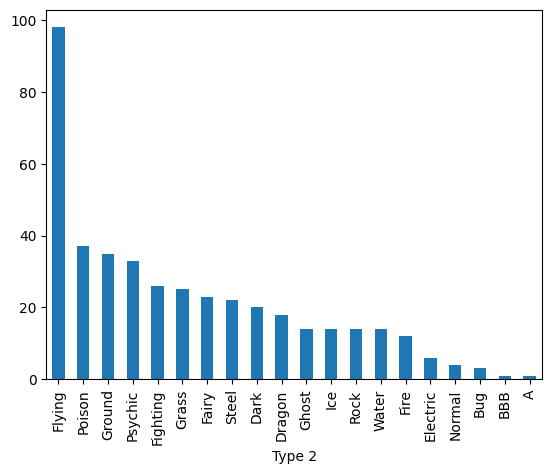

In [6]:
# 删除异常值273和0
df.loc[df['Type 2'].isin([273, 0, '273', '0']), 'Type 2'] = np.nan
df['Type 2'].value_counts().plot(kind='bar')

数据集中存在重复值

In [7]:
duplicate_count = df.duplicated().sum()
print(f'重复行数:{duplicate_count}')
df = df.drop_duplicates()

print(f'清除后的重复行数:{df.duplicated().sum()}')

重复行数:5
清除后的重复行数:0


Attack属性存在过高的异常值

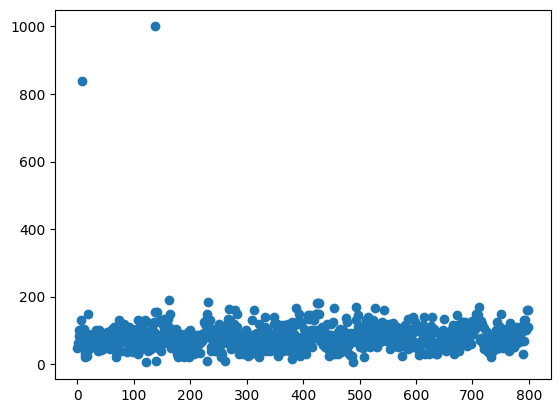

In [8]:
import matplotlib.pyplot as plt


y_attack = df.iloc[:, 6].dropna().to_numpy()
y_attack_series = pd.to_numeric(y_attack, errors='coerce')
y_attack = y_attack_series

plt.scatter(range(0, y_attack.shape[0]), y_attack)

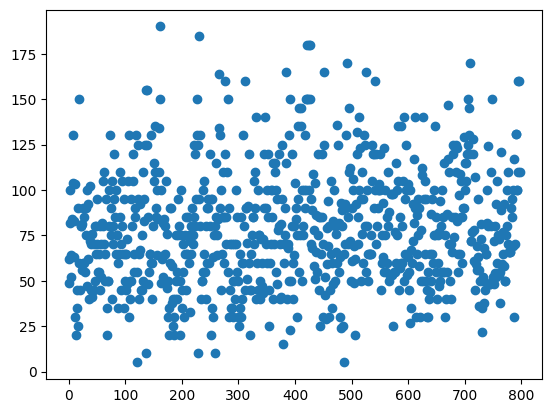

In [9]:
# 把那两个离群值去掉
df['Attack'] = pd.to_numeric(df['Attack'], errors='coerce')
df.loc[df['Attack'] > 800, 'Attack'] = np.nan

y_attack = df.iloc[:, 6].dropna().to_numpy()
y_attack_series = pd.to_numeric(y_attack, errors='coerce')
y_attack = y_attack_series

plt.scatter(range(0, y_attack.shape[0]), y_attack)

有两条数据(实际好像不止)的Generation与Legendary属性被置换

In [10]:
# undefined去除
df['Generation'] = df['Generation'].astype(str).replace('undefined', np.nan)

# 生成掩码
target_mask = df['Generation'].astype(str).str.strip().str.lower().isin(['true', 'false'])
target_rows = df[target_mask]

# 交换回来
gen_temp = df.loc[target_mask, 'Generation'].copy()
leg_temp = df.loc[target_mask, 'Legendary'].copy()
df.loc[target_mask, 'Generation'] = leg_temp
df.loc[target_mask, 'Legendary'] = gen_temp

In [11]:
target_mask_af = df['Generation'].astype(str).str.strip().str.lower().isin(['true', 'false'])
target_rows_af = df[target_mask_af]
len(target_rows_af)

0

Legendary属性有非法值，应去除

In [12]:
legendary_str = df['Legendary'].astype(str).str.strip().str.lower()
invalid_mask = ~legendary_str.isin(['true', 'false'])
df.loc[invalid_mask, 'Legendary'] = np.nan

In [13]:
legendary_str_af = df['Legendary'].astype(str).str.strip().str.lower()
invalid_mask_af = ~legendary_str_af.isin(['true', 'false', 'nan'])
len(df.loc[invalid_mask_af, 'Legendary'])

0

替换所有undefined值为nan

In [14]:
df = df.replace('undefined', np.nan)

has_undefined = any('undefined' in df[col].astype(str).values for col in df.columns)
print(f"是否还有undefined：{has_undefined}")  

是否还有undefined：False


Defense和Speed都有负值，需要替换成nan

In [22]:
df['Defense'] = pd.to_numeric(df['Defense'], errors='coerce')
df[df['Defense'] < 0]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
349,315,Roselia,Grass,Poison,400,50,60.0,-10.0,100,80,65,3,FALSE


In [24]:
df['Defense'] = df['Defense'].where(df['Defense'] >= 0, np.nan)
len(df[df['Defense'] < 0])

0

In [25]:
df['Speed'] = pd.to_numeric(df['Speed'], errors='coerce')
df[df['Speed'] < 0]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
620,554,Darumaka,Fire,NaN,315,70,90.0,45.0,15,45,-50.0,5,FALSE


In [26]:
df['Speed'] = df['Speed'].where(df['Speed'] >= 0, np.nan)
len(df[df['Speed'] < 0])

0